<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 1</center></h2>

#### Brief
Please refer to the document attached with this assignment for submission instructions and other requirements. Please do not change the order of the notebook. Implement your solutions in the spaces provided.

#### Overview
In the first part of this assignment, you will pre-process the given data.<br>
In the second part, you will implement Linear Regression as discussed in class.<br>
For Part 1, we will use 'googleplaystore.csv' dataset which contain information of application on the Google Play Store.<br>
For Part 2, we will use scaled down version of Boston house price dataset.
All datasets have been provided along with this .ipynb file on the classroom.

#### Muhammad Khubaib Raza
### MSDS19064

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Part 1
### Data Pre-Processing and Visualization

In [4]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')

coloumns 

In [5]:
'''
Print the names of all columns in the dataset.
'''
# YOUR CODE HERE
print(data.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


Handled missing values using average out above and below cells. pandas dataframe have built in method interpolate and bfill can do this work for us

In [6]:
'''
Some "Rating" values are missing (NaN), fill them by taking the average of the "Rating" values in the rows above and below.
Incase the "Rating" value in the row below is also missing, use only the row above.
'''
# YOUR CODE HERE

data.Rating=data.Rating.interpolate().round(1).bfill()


preprocessing of data Installs and Price for later use,replaced with most frequent words and convert into float and int respectively use for calculation

In [7]:
'''
Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which have a
Rating of 4.3 or below.
You need to process the strings in the "Installs" and "Price" columns to retrieve their values as integers.
You need to sum up the individual profits for all apps that meet the above condition.
'''
# YOUR CODE HERE


data.Installs=data.Installs.str.strip("+").str.replace(",","").str.replace("Free","0").apply(int)
data.Price=data.Price.str.strip("$").str.replace(",","").str.replace("Everyone","0.").apply(float)

def total_profit():
    total_profit=0
    for index in range(len(data)):
        if data.iloc[0]['Rating'] <=4.3:
            total_profit+=(data.iloc[0]['Rating']*data.iloc[0]['Rating'])
            
            
    return total_profit

print("Rating equal or below then 4.3 is= %.2f" % total_profit())


Rating equal or below then 4.3 is= 182237.21


Visualized Category columns with frequency of value, Where it shows the most Installed category is Family and  Games. Most people like to download these categories.

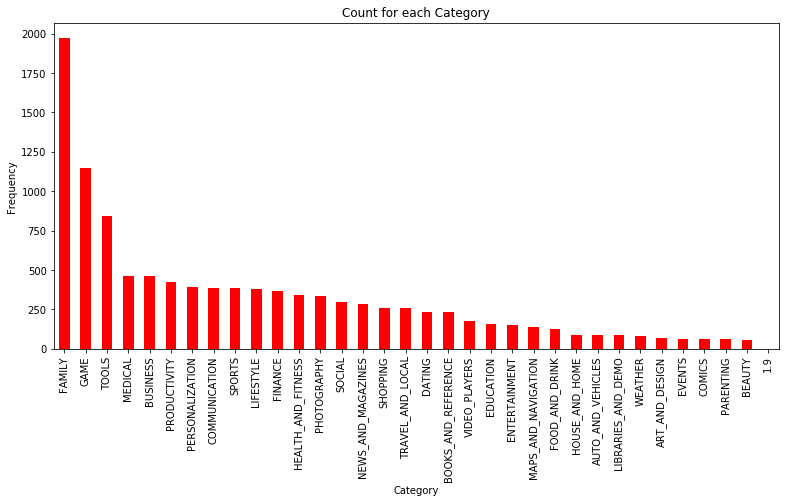

In [8]:
'''
Create a histogram of the total counts of each Category in the dataset.
'''
# YOUR CODE HERE
draw=data['Category'].value_counts().plot(kind='bar',\
                                    figsize=(13,6),title="Count for each Category", color="red")
draw.set_xlabel("Category")
draw.set_ylabel("Frequency")
plt.show()

Profit raised by each android version, In bar graph you can cleary see that varies with device has more profit than any other android version and 4.0.3 and up android version who has these apps generates more profits. It seems that Those apps work on customer needs and time to time update app features and debug erros for better customer experiance. These all values are in power of exponent exp{8}

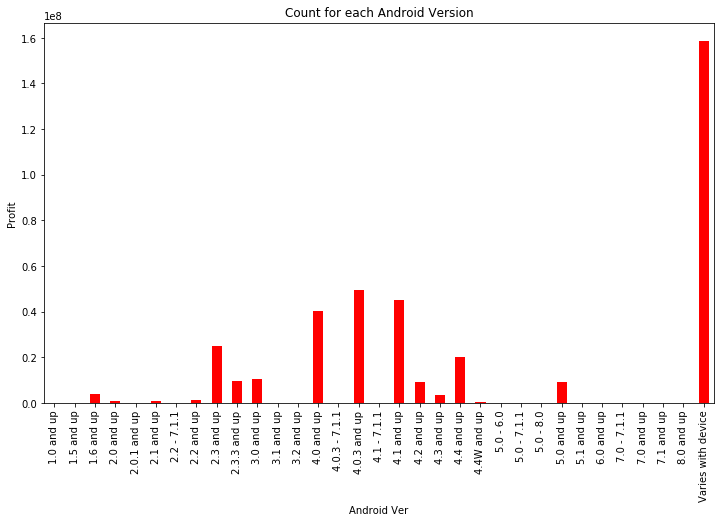

In [9]:
'''
Create a bar graph of profit generated by each android version.
'''
# YOUR CODE HERE
# data['Android Ver'].value_counts()

data['Profit']=data.Price*data.Installs


draw=data.groupby('Android Ver')['Profit'].sum().astype('int64').\
                                    plot(kind='bar',\
                                    figsize=(12,7),title="Count for each Android Version", color="red")
draw.set_xlabel("Android Ver")
draw.set_ylabel("Profit")
plt.show()

No of install per each content in family category rating, In plot you can see in family category "everyone" has more "Installs" that anyother category and second most installs is "Teen".

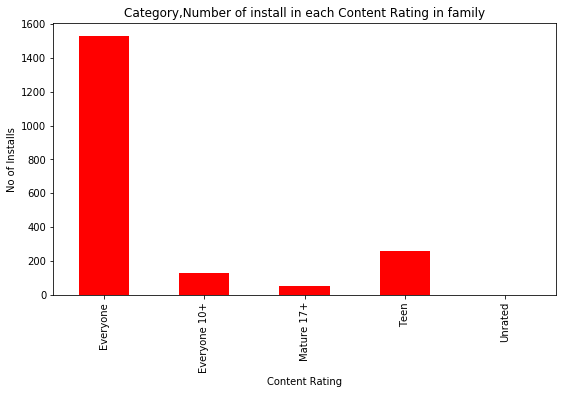

In [10]:
'''
For family category, plot number of installations against each content rating.
'''
# YOUR CODE HERE ('Rating')['Installs'].count()
draw=data.query('Category == "FAMILY"').groupby('Content Rating')['Installs'].count().plot(kind='bar',
                                                                                      color='red',figsize=(9,5),
                                                                                      title='Category,Number of install in each Content Rating in family')
draw.set_xlabel("Content Rating")
draw.set_ylabel("No of Installs")
plt.show()

# Part 2
### Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

In [11]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

#You can load the second dataset in similar fashion
(x_train2, y_train2), (x_test2, y_test2)= pickle.load( open( "dataset2.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train),1)
x_test.resize(len(x_test),1)
y_train.resize(len(y_train),1)
y_test.resize(len(y_test),1)

x_train2.resize(len(x_train2),1)
x_test2.resize(len(x_test2),1)
y_train2.resize(len(y_train2),1)
y_test2.resize(len(y_test2),1)

#### Part 2.a Linear Regression(without gradient descent)  Data set 1 

Used modular approach for reusability of code, We can check out the results below

In [12]:
def plot_train_test_color(x_train,x_test,y_train,y_test):
    '''
    parametrs training set and test set passed by use and draw scatter plot
    '''
    plt.scatter(x_train,y_train,color='red',label ="Train")
    plt.scatter(x_test,y_test,c='purple',label ="Test")
    plt.title("Test and train Data plot")
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.legend()
    plt.show()

<html5>
<img src="mse.png",width=250>
</html5>

<html5>
<img src="ls_mse.png",width=250>
</html5>

In [13]:

def computer_params_no_grad(X,y):
    
    x_mean=np.mean(X)
    y_mean=np.mean(y_train)


    nem=np.dot(np.transpose(np.subtract(y,y_mean)),np.subtract(X,x_mean)).round(2)
    denom=np.subtract(X,x_mean)
    denom=np.dot(np.transpose(denom),denom).round(2)
    
    beta= nem/denom

    a=(y_mean-beta*x_mean).round(2)
    
    return (beta,a)

In [14]:
'''
Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted) 
where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
'''
def mean_square_error(Y_actual,Y_predicted):
    # YOUR CODE HERE
    mse=np.subtract(Y_actual,Y_predicted)
    mse=np.dot(np.transpose(mse),mse)/len(x_train)
    return mse 

In [15]:
def compute_loss(X, y, beta, a_hat):
    y_pre=np.multiply(beta,X)+a_hat
    
    loss=mean_square_error(y , y_pre).round(2)
    return loss

In [16]:
def plot_dataset_with_line(X, y, b, a):
    plt.scatter(X, y)
    y_pre=np.multiply(b,X)+a
    
    plt.plot(X,y_pre, c="red",label="fit line on a Data")

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.legend()
    plt.show()

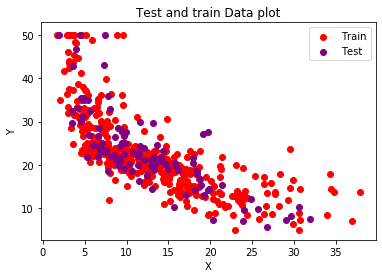

In [17]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
plot_train_test_color(x_train,x_test,y_train,y_test)

In [18]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''

beta,a_hat = computer_params_no_grad(x_train,y_train)
print('Beta(m) : ',beta.round(2),'\na-hat(c): ',a_hat)

Beta(m) :  [[-0.93]] 
a-hat(c):  [[34.22]]


In [19]:
'''
Compute mean square error from line using training data i.e. training error.
'''
# YOUR CODE HERE

loss = compute_loss(x_train, y_train, beta, a_hat)
print('MSE training Loss: ',loss)

MSE training Loss:  [[39.43]]


In [20]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE HERE
loss = compute_loss(x_test,y_test, beta, a_hat)
print('MSE Testing Loss: ',loss)

MSE Testing Loss:  [[8.8]]


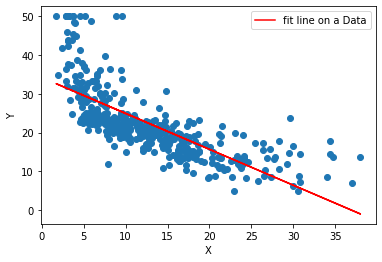

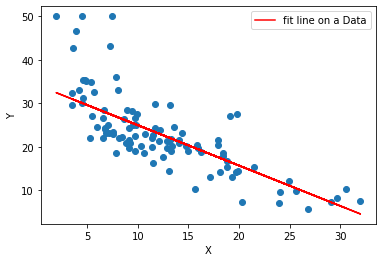

In [21]:
'''
Plot regression line on training and testing data separately.
'''
# YOUR CODE HERE
plot_dataset_with_line(x_train,y_train,beta,a_hat,)
plot_dataset_with_line(x_test, y_test, beta, a_hat)

####  Linear Regression (without gradient descent) Second Dataset

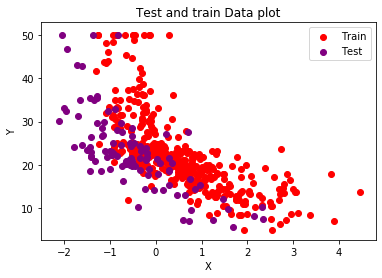

In [22]:
plot_train_test_color(x_train2,x_test2,y_train2,y_test2)

In [23]:
beta2,a_hat2 = computer_params_no_grad(x_train2,y_train2)
print('Beta(m) : ',beta2.round(2),'\na-hat(c): ',a_hat2)

Beta(m) :  [[-6.24]] 
a-hat(c):  [[25.53]]


In [24]:
'''
Compute mean square error from line using Train data i.e. Train error.
'''
train_loss = compute_loss(x_train2, y_train2, beta2, a_hat2)
print('MSE training Loss: ',train_loss)

MSE training Loss:  [[42.84]]


In [25]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE HERE
test_loss = compute_loss(x_test2,y_test2, beta2, a_hat2)
print('MSE Testing Loss: ',test_loss)

MSE Testing Loss:  [[17.89]]


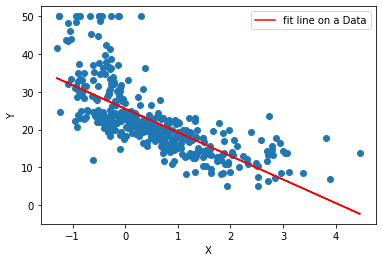

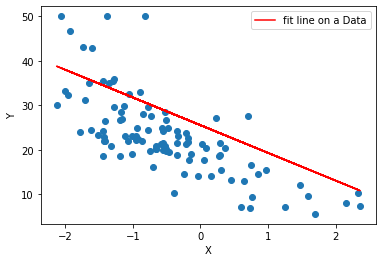

In [26]:
'''
Plot regression line on training and testing data separately.
'''
plot_dataset_with_line(x_train2,y_train2,beta2,a_hat2)
plot_dataset_with_line(x_test2, y_test2, beta2, a_hat2)

#### Part 2.b Linear Regression (with gradient descent)

On this data set we try to predict house price using Linear regression and find out parameters that best suit our data. So we used Stochastic Gradient to minimize the error and find out parameters for linear line and try different parameters changed no of epochs and learning rate observed that after

In [27]:
def stochastic_grad_descent(x_train,y_train,theta,learning_rate,epoch):
    
    N = len(y_train)
    total_cost = np.zeros(epoch)
    for it in range(epoch):
        cost =0.0
        for i in range(N):
            rand_ind = np.random.randint(0,N)
            x_train_sample = x_train[rand_ind,:].reshape(1,x_train.shape[1])
            
            y_train_sample = y_train[rand_ind].reshape(1,1)
            
            prediction = np.dot(x_train_sample,theta)
            theta = theta -(1/N)*learning_rate*( np.dot(x_train_sample.transpose(),(prediction - y_train_sample)))
            cost += mean_square_error(prediction,y_train_sample)
        total_cost[it]  = cost
        
    return theta, total_cost

In [28]:
def plot_dataset_grad_with_line(X, y,theta):
    plt.scatter(X[:,1:2], y)
    y_pre=np.dot(X,theta)
    plt.plot(X[:,1:2],y_pre, c="red",label="fit line on a Data")
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.legend()
    plt.show()

In [47]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''
# YOUR CODE HERE

alpha =0.1
epochs = 1000 # use 1000 as you mentioned in pdf 
theta = np.random.randn(2,1)


In [48]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''
# YOUR CODE HERE
bias_col=np.ones((len(x_train),1))
x_train_bias = np.c_[bias_col,x_train]
theta,cost_history = stochastic_grad_descent(x_train_bias, y_train, theta, alpha, epochs)

print('weight ',theta[0],'\nBias:  ',theta[1])


weight  [34.22458013] 
Bias:   [-0.91297596]


In [107]:
'''
Compute mean square error of final trained parameters on testing data
'''
# YOUR CODE HERE
x_test_bias = np.c_[np.ones((len(x_test),1)),x_test]

y_pre_test=np.dot(x_test_bias,theta)
mse_test=mean_square_error(y_pre_test,y_test)

print("Mean Square Error(MSE) Testig Loss: ",mse_test)

Mean Square Error(MSE) Testig Loss:  [[8.80263974]]


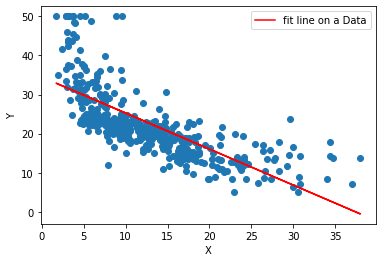

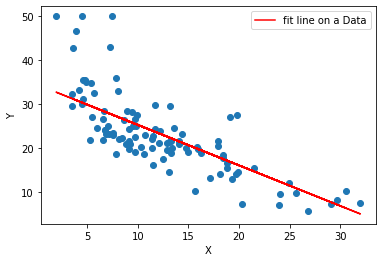

In [108]:
'''
Plot a regression line on the training and the testing data separately.
'''
# YOUR CODE HERE
plot_dataset_grad_with_line(x_train_bias,y_train,theta)
plot_dataset_grad_with_line(x_test_bias,y_test,theta)


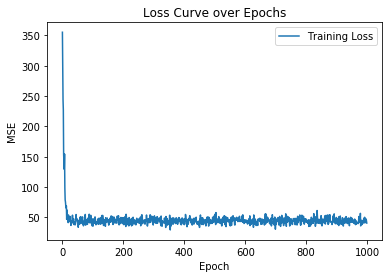

In [109]:
plt.plot(cost_history)
plt.legend(['Training Loss'])
plt.title('Loss Curve over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE') 
plt.show()

### Second Dataset

As we above apply linear regression and Try to find out best parametrs for minimization uses Stochastic Gradient Descent(SGD). Played with different learning rate and epochs

In [59]:
alpha =0.9
epochs = 50
theta = np.random.randn(2,1)

In [60]:
bias_col2=np.ones((len(x_train2),1))
#bias is nx1 coloumn append to training set 
x_train_bias2 = np.c_[bias_col2,x_train2]
#function call
theta,cost_history = stochastic_grad_descent(x_train_bias2, y_train2, theta, alpha, epochs)
print('weight: ',theta[0],'\nBias:   ',theta[1])

weight:  [25.40932104] 
Bias:    [-6.14293244]


In [51]:
x_train_bias2 = np.c_[np.ones((len(x_train2),1)),x_train2]

y_pre_train2=np.dot(x_train_bias2,theta)
mse_train2=mean_square_error(y_pre_train2,y_train2)

print("Mean Square Error(MSE) Testig Loss: ",mse_train2)

Mean Square Error(MSE) Testig Loss:  [[42.85606231]]


In [52]:
x_test_bias2 = np.c_[np.ones((len(x_test2),1)),x_test2]

y_pre_test2=np.dot(x_test_bias2,theta)

mse_test2=mean_square_error(y_pre_test2,y_test2)

print("Mean Square Error(MSE) Testig Loss: ",mse_test2)


Mean Square Error(MSE) Testig Loss:  [[17.44745092]]


As you can see in graphs line is try to fit on data 

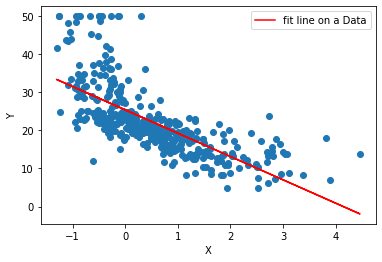

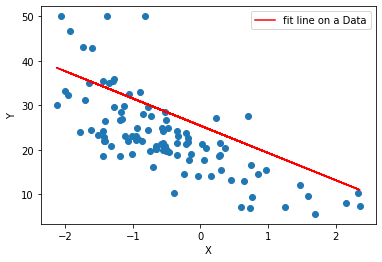

In [53]:
plot_dataset_grad_with_line(x_train_bias2,y_train2,theta)

plot_dataset_grad_with_line(x_test_bias2,y_test2,theta)


Training loss is indeed expected to decrease as stochastic Gradient Descent learns parameters.Loss(MSE) is about 40 to 50 as you can see above.

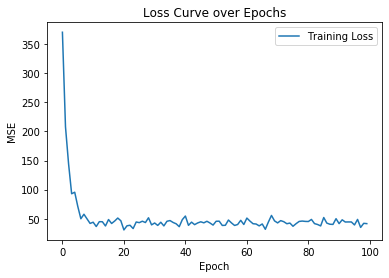

In [56]:
plt.plot(cost_history)
plt.legend(['Training Loss'])
plt.title('Loss Curve over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()
# cost_history

**End of Notebook**